<a href="https://colab.research.google.com/github/Weasley108/Investathon-task/blob/main/Copy_of_SA_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dfnormal = pd.read_csv("/content/A1O1_normal.csv")
dfapnea = pd.read_csv("/content/apnea.csv")

In [ ]:

print(dfnormal.shape)
print(dfapnea.shape)

# For Apnea dataset
apnea_min = dfapnea['Amplitude'].min()
apnea_max = dfapnea['Amplitude'].max()

# For Normal dataset
normal_min = dfnormal['EEG O1-A1'].min()
normal_max = dfnormal['EEG O1-A1'].max()

print(f"Apnea dataset range: {apnea_min} to {apnea_max}")
print(f"Normal dataset range: {normal_min} to {normal_max}")


(124220, 2)
(360000, 2)
Apnea dataset range: -1.17 to 2.42
Normal dataset range: -148.828125 to 157.2265625


## Visualization


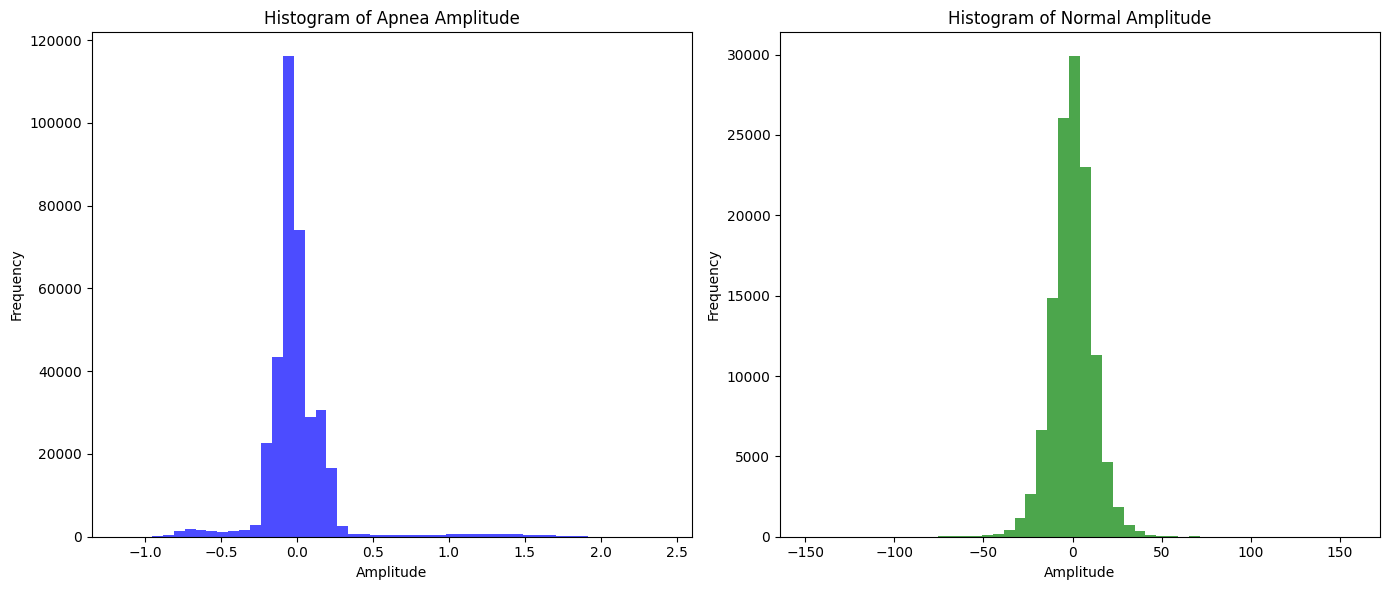

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for Apnea and Normal datasets
plt.figure(figsize=(14, 6))

# Plot histogram for Apnea dataset
plt.subplot(1, 2, 1)
plt.hist(dfapnea['Amplitude'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Apnea Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')

# Plot histogram for Normal dataset
plt.subplot(1, 2, 2)
plt.hist(dfnormal['EEG O1-A1'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of Normal Amplitude')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


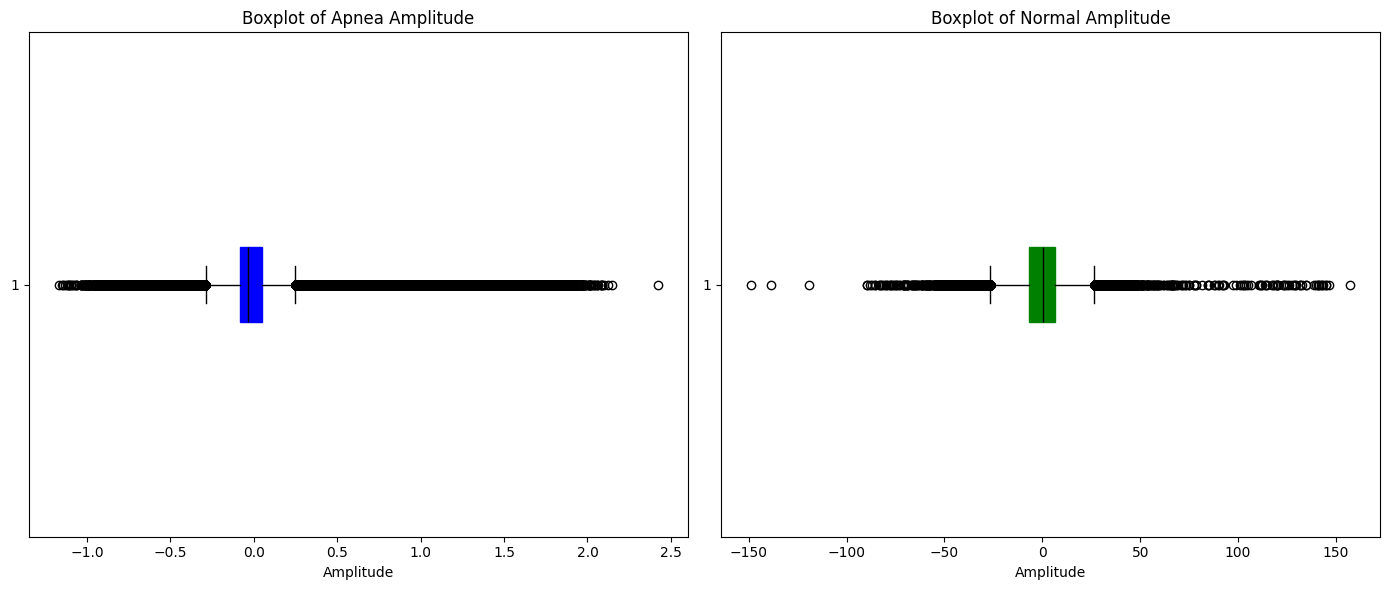

In [ ]:
# Plot boxplots for Apnea and Normal datasets
plt.figure(figsize=(14, 6))

# Plot boxplot for Apnea dataset
plt.subplot(1, 2, 1)
plt.boxplot(dfapnea['Amplitude'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            medianprops=dict(color='black'))
plt.title('Boxplot of Apnea Amplitude')
plt.xlabel('Amplitude')

# Plot boxplot for Normal dataset
plt.subplot(1, 2, 2)
plt.boxplot(dfnormal['EEG O1-A1'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='green', color='green'),
            medianprops=dict(color='black'))
plt.title('Boxplot of Normal Amplitude')
plt.xlabel('Amplitude')

plt.tight_layout()
plt.show()


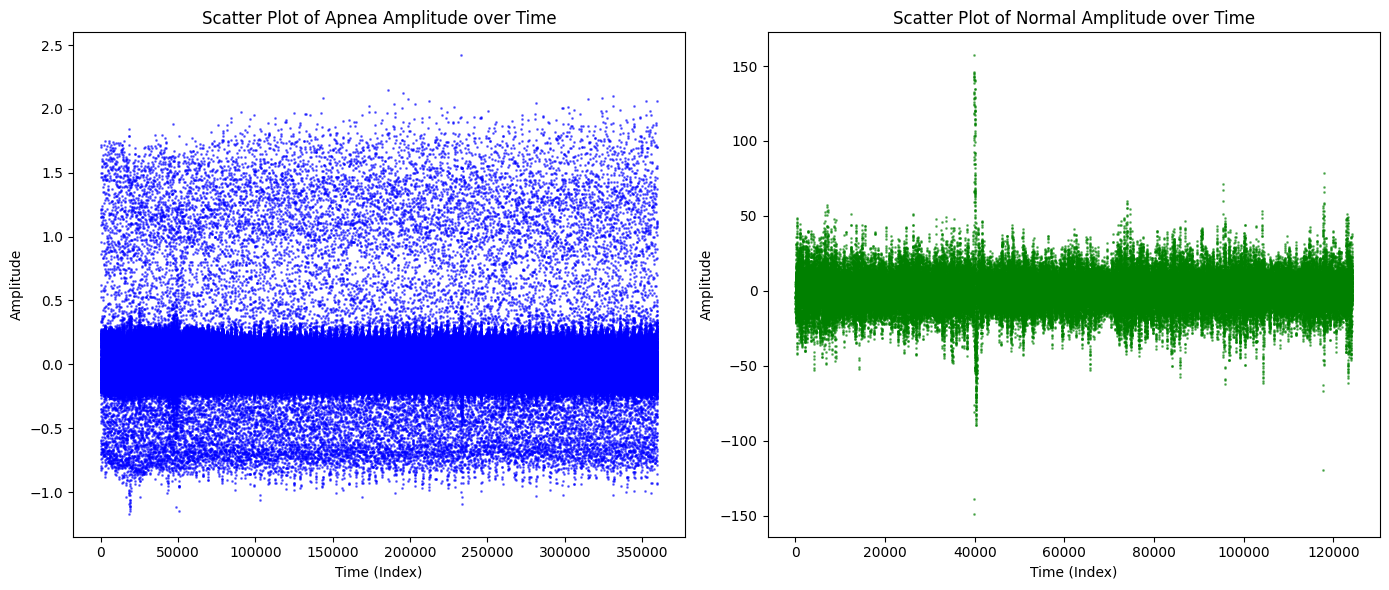

In [ ]:
# Plot scatter plots for Apnea and Normal datasets over time
plt.figure(figsize=(14, 6))

# Scatter plot for Apnea dataset (using index as time)
plt.subplot(1, 2, 1)
plt.scatter(dfapnea.index, dfapnea['Amplitude'], color='blue', alpha=0.5, s=1)
plt.title('Scatter Plot of Apnea Amplitude over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')

# Scatter plot for Normal dataset (using index as time)
plt.subplot(1, 2, 2)
plt.scatter(dfnormal.index, dfnormal['EEG O1-A1'], color='green', alpha=0.5, s=1)
plt.title('Scatter Plot of Normal Amplitude over Time')
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


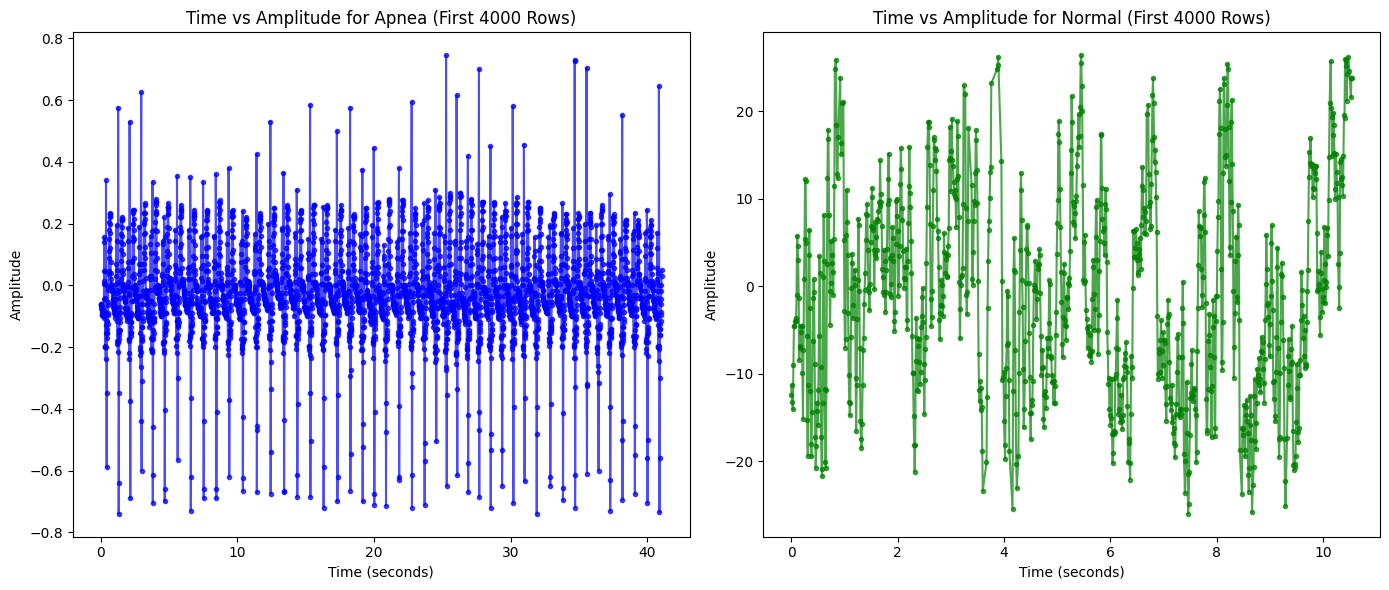

In [ ]:
plt.figure(figsize=(14, 6))

# Line plot for Apnea dataset (first 1000 rows)
plt.subplot(1, 2, 1)
plt.plot(dfapnea['Seconds'][:4000], dfapnea['Amplitude'][:4000], color='blue', alpha=0.7, marker='o', markersize=3)
plt.title('Time vs Amplitude for Apnea (First 4000 Rows)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Line plot for Normal dataset (first 1000 rows)
plt.subplot(1, 2, 2)
plt.plot(dfnormal['seconds'][:1000], dfnormal['EEG O1-A1'][:1000], color='green', alpha=0.7, marker='o', markersize=3)
plt.title('Time vs Amplitude for Normal (First 4000 Rows)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

downsample

In [ ]:
# Number of rows to delete
n = 235780
# Remove the last n rows
dfapnea_downsampled = dfapnea.iloc[:-n]
print(dfapnea_downsampled.tail())
print(dfapnea_downsampled.shape)

        Seconds  Amplitude
124215  1242.15     -0.065
124216  1242.16     -0.055
124217  1242.17     -0.075
124218  1242.18     -0.090
124219  1242.19     -0.055
(124220, 2)


Outlier Correction

In [ ]:
Q1 = dfnormal['EEG O1-A1'].quantile(0.25)
Q3 = dfnormal['EEG O1-A1'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Winsorize the data
dfnormal['EEG O1-A1'] = dfnormal['EEG O1-A1'].clip(lower=lower_bound, upper=upper_bound)
print(dfnormal.shape)
print(dfnormal.tail(10))

(124220, 2)
        seconds  EEG O1-A1
124210  1242.10   8.691406
124211  1242.11  12.792969
124212  1242.12  20.703125
124213  1242.13  26.562500
124214  1242.14  26.562500
124215  1242.15  26.562500
124216  1242.16  26.562500
124217  1242.17  26.562500
124218  1242.18  18.261719
124219  1242.19  12.109375


(124220, 2)


<function matplotlib.pyplot.show(close=None, block=None)>

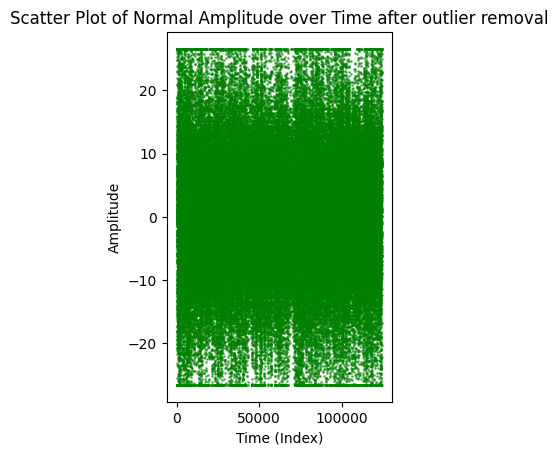

In [ ]:
#after outlier removal
print(dfnormal.shape)
# Scatter plot for Normal dataset (using index as time)
import matplotlib.pyplot as plt
plt.subplot(1, 2, 2)
plt.scatter(dfnormal.index, dfnormal['EEG O1-A1'], color='green', alpha=0.5, s=1)
plt.title('Scatter Plot of Normal Amplitude over Time after outlier removal')
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')
plt.show

In [ ]:
# For Normal dataset
normal_min = dfnormal['EEG O1-A1'].min()
normal_max = dfnormal['EEG O1-A1'].max()

print(f"Normal dataset range after outlier correction: {normal_min} to {normal_max}")

Normal dataset range after outlier correction: -26.5625 to 26.5625


In [ ]:
#apnea datset outlier correction
from scipy import stats

# Calculate z-scores
dfapnea_downsampled['z_score'] = stats.zscore(dfapnea_downsampled['Amplitude'])

# Define the lower and upper bounds using a z-score threshold
z_threshold = 3
lower_bound = dfapnea_downsampled['Amplitude'].mean() - z_threshold * dfapnea_downsampled['Amplitude'].std()
upper_bound = dfapnea_downsampled['Amplitude'].mean() + z_threshold * dfapnea_downsampled['Amplitude'].std()

# Winsorize the data (clip values to the bounds)
dfapnea_downsampled['Amplitude'] = dfapnea_downsampled['Amplitude'].clip(lower=lower_bound, upper=upper_bound)

# Drop the 'z_score' column as it's no longer needed
dfapnea_downsampled = dfapnea_downsampled.drop(columns=['z_score'])

print(f'apnea eeg after outlier correction {dfapnea_downsampled.shape}')


apnea eeg after outlier correction (124220, 2)


<ipython-input-7-5430bd381974>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapnea_downsampled['z_score'] = stats.zscore(dfapnea_downsampled['Amplitude'])
<ipython-input-7-5430bd381974>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfapnea_downsampled['Amplitude'] = dfapnea_downsampled['Amplitude'].clip(lower=lower_bound, upper=upper_bound)


In [ ]:
# dfapnea.head()

In [ ]:
# dfapnea = dfapnea.drop('z_score', axis=1)

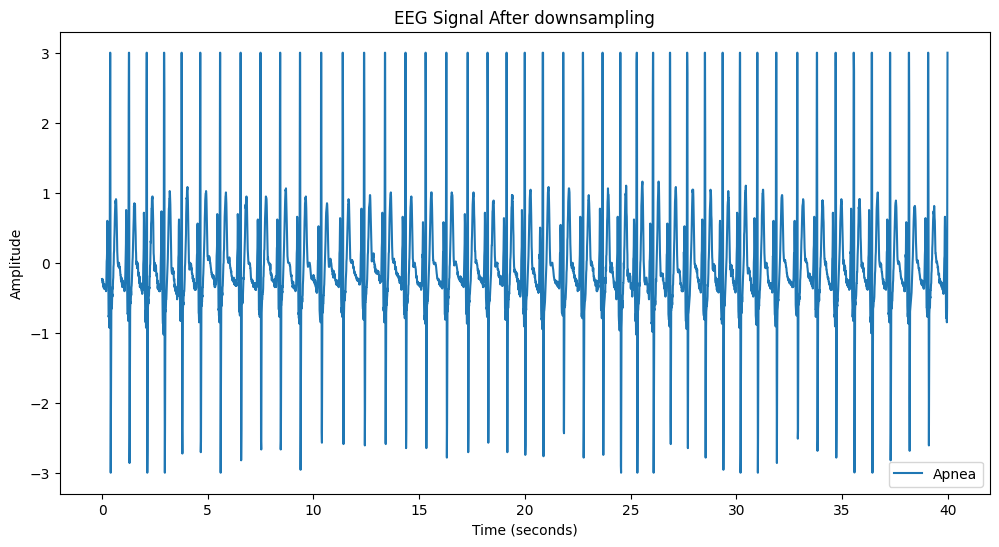

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(dfapnea_downsampled['Seconds'][:4000], dfapnea_downsampled['Amplitude'][:4000], label='Apnea',  markersize=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('EEG Signal After downsampling')
plt.legend()
plt.show()




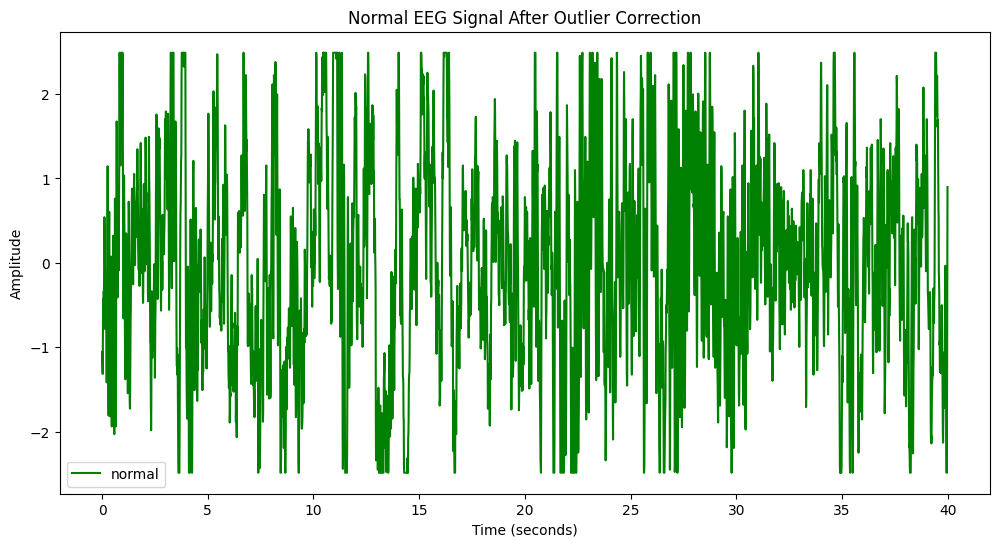

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfnormal['seconds'][:4000], dfnormal['EEG O1-A1'][:4000], color= 'green', label='normal',  markersize=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Normal EEG Signal After Outlier Correction')
plt.legend()
plt.show()

Normalizing values

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale amplitudes independently
dfapnea_downsampled['Amplitude'] = scaler.fit_transform(dfapnea_downsampled[['Amplitude']])
dfnormal['EEG O1-A1'] = scaler.fit_transform(dfnormal[['EEG O1-A1']])

# Time remains unchanged
print(dfapnea_downsampled.tail(10))
print(dfnormal.tail(10))

        Seconds  Amplitude
124210  1242.10  -0.192032
124211  1242.11  -0.192032
124212  1242.12  -0.216383
124213  1242.13  -0.216383
124214  1242.14  -0.167680
124215  1242.15  -0.265087
124216  1242.16  -0.216383
124217  1242.17  -0.313790
124218  1242.18  -0.386845
124219  1242.19  -0.216383
        seconds  EEG O1-A1
124210  1242.10   0.815284
124211  1242.11   1.199412
124212  1242.12   1.940231
124213  1242.13   2.488986
124214  1242.14   2.488986
124215  1242.15   2.488986
124216  1242.16   2.488986
124217  1242.17   2.488986
124218  1242.18   1.711583
124219  1242.19   1.135391


In [ ]:
print(dfnormal.shape)
print(dfapnea_downsampled.shape)

# For Apnea dataset
apnea_min = dfapnea_downsampled['Amplitude'].min()
apnea_max = dfapnea_downsampled['Amplitude'].max()

# For Normal dataset
normal_min = dfnormal['EEG O1-A1'].min()
normal_max = dfnormal['EEG O1-A1'].max()

print(f"Apnea dataset range: {apnea_min} to {apnea_max}")
print(f"Normal dataset range: {normal_min} to {normal_max}")

(124220, 2)
(124220, 2)
Apnea dataset range: -3.7272464926042326 to 3.8322082091235137
Normal dataset range: -2.486389872445437 to 2.4889858033421284


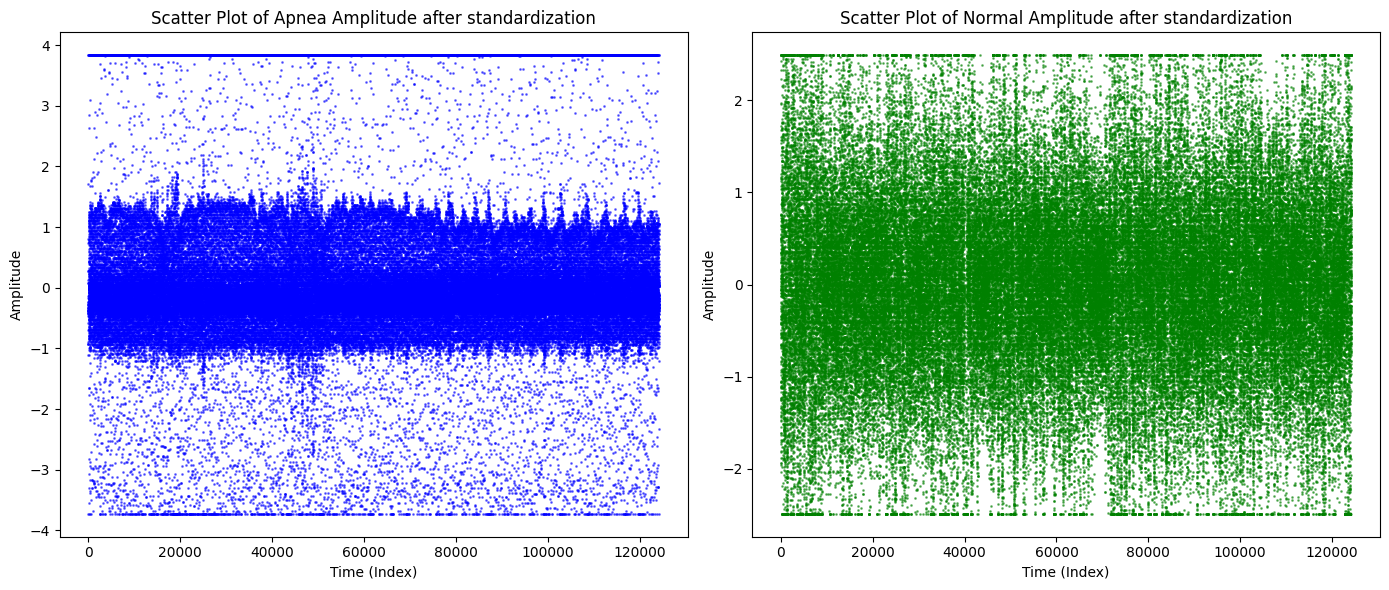

In [ ]:
# Plot scatter plots for Apnea and Normal datasets over time
plt.figure(figsize=(14, 6))

# Scatter plot for Apnea dataset (using index as time)
plt.subplot(1, 2, 1)
plt.scatter(dfapnea_downsampled.index, dfapnea_downsampled['Amplitude'], color='blue', alpha=0.5, s=1)
plt.title('Scatter Plot of Apnea Amplitude after standardization')
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')

# Scatter plot for Normal dataset (using index as time)
plt.subplot(1, 2, 2)
plt.scatter(dfnormal.index, dfnormal['EEG O1-A1'], color='green', alpha=0.5, s=1)
plt.title('Scatter Plot of Normal Amplitude after standardization')
plt.xlabel('Time (Index)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


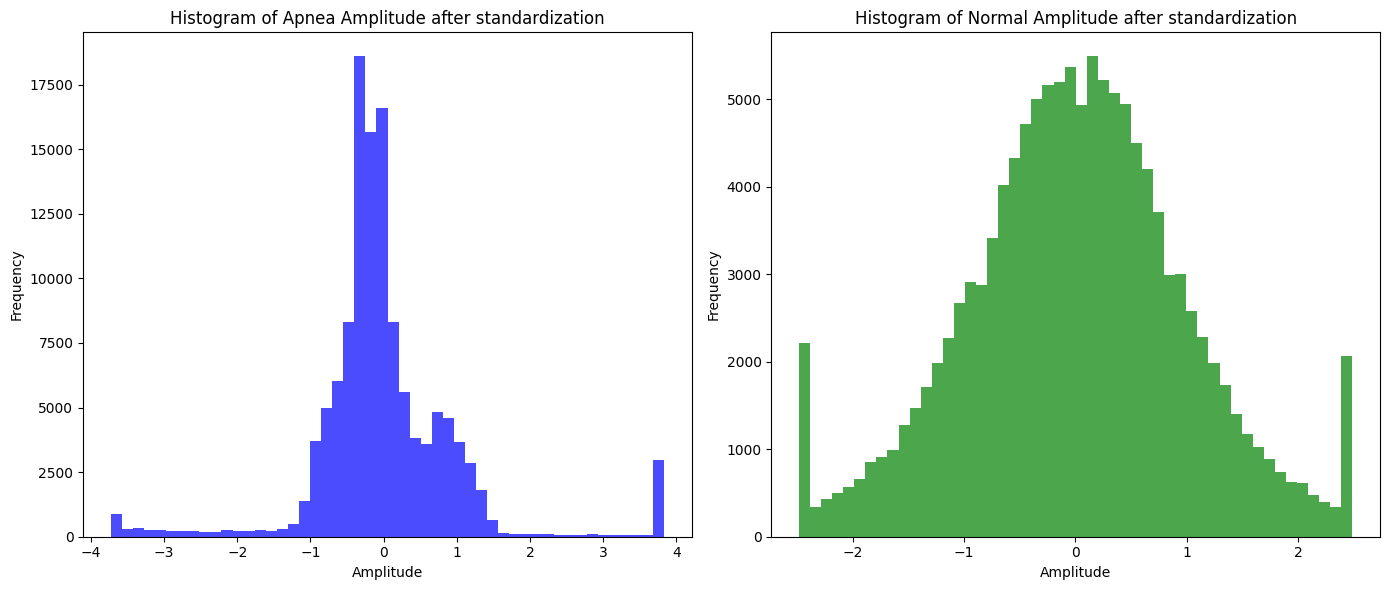

In [ ]:
# Plot histograms for Apnea and Normal datasets
plt.figure(figsize=(14, 6))

# Plot histogram for Apnea dataset
plt.subplot(1, 2, 1)
plt.hist(dfapnea_downsampled['Amplitude'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Apnea Amplitude after standardization')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')

# Plot histogram for Normal dataset
plt.subplot(1, 2, 2)
plt.hist(dfnormal['EEG O1-A1'], bins=50, color='green', alpha=0.7)
plt.title('Histogram of Normal Amplitude after standardization')
plt.xlabel('Amplitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


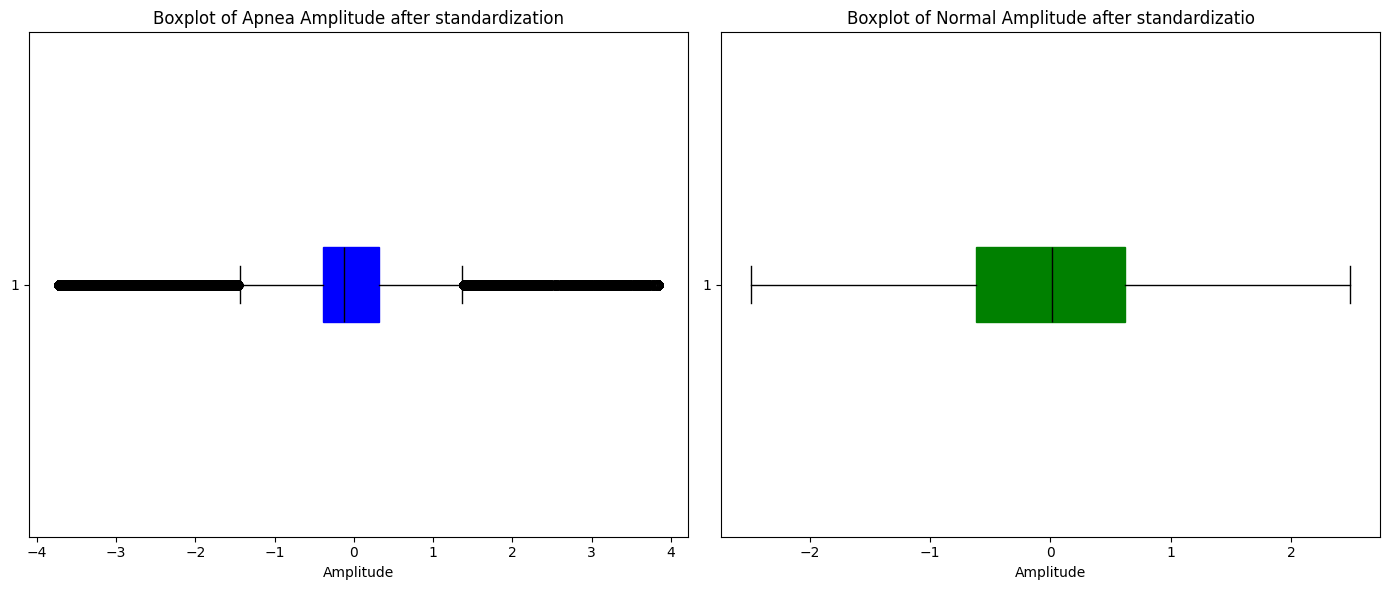

In [ ]:
# Plot boxplots for Apnea and Normal datasets
plt.figure(figsize=(14, 6))

# Plot boxplot for Apnea dataset
plt.subplot(1, 2, 1)
plt.boxplot(dfapnea_downsampled['Amplitude'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='blue', color='blue'),
            medianprops=dict(color='black'))
plt.title('Boxplot of Apnea Amplitude after standardization')
plt.xlabel('Amplitude')

# Plot boxplot for Normal dataset
plt.subplot(1, 2, 2)
plt.boxplot(dfnormal['EEG O1-A1'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='green', color='green'),
            medianprops=dict(color='black'))
plt.title('Boxplot of Normal Amplitude after standardizatio')
plt.xlabel('Amplitude')

plt.tight_layout()
plt.show()


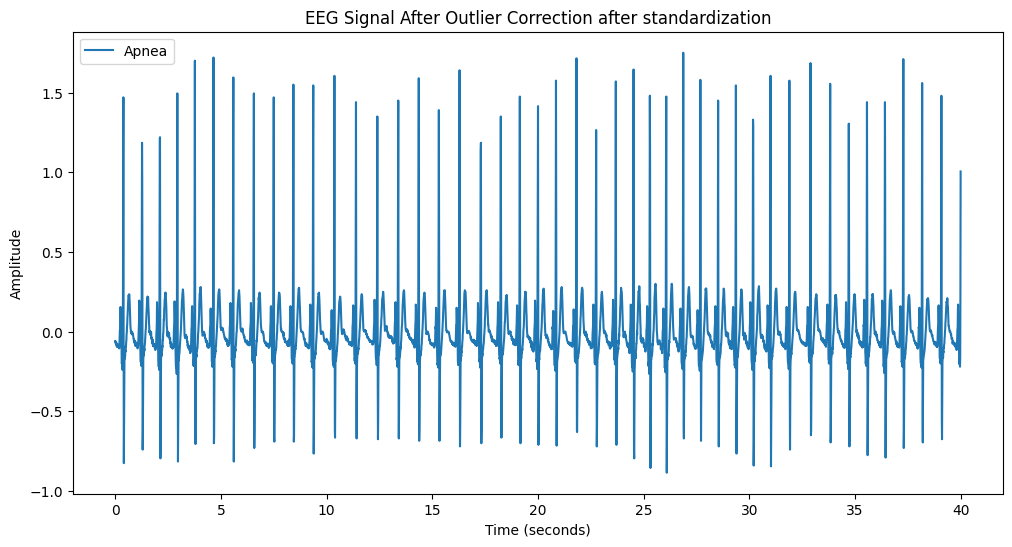

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfapnea_downsampled['Seconds'][:4000], dfapnea['Amplitude'][:4000], label='Apnea',  markersize=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('EEG Signal After Outlier Correction after standardization')
plt.legend()
plt.show()

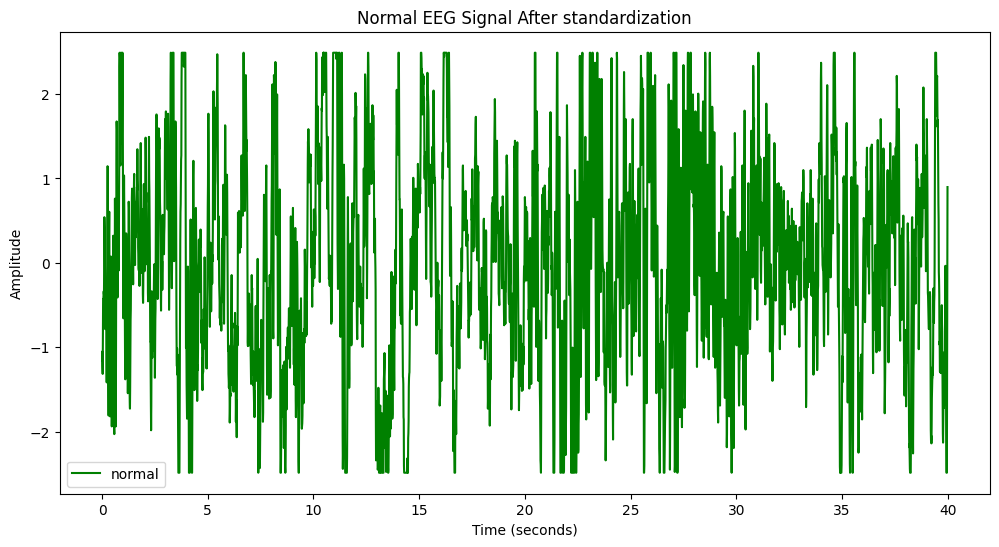

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfnormal['seconds'][:4000], dfnormal['EEG O1-A1'][:4000], color= 'green', label='normal',  markersize=1)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Normal EEG Signal After standardization')
plt.legend()
plt.show()

Merging and Labeling the datsets

In [ ]:
# Rename columns for consistency
dfnormal.rename(columns={'seconds': 'time', 'EEG O1-A1': 'amplitude'}, inplace=True)
dfapnea_downsampled.rename(columns={'Seconds': 'time', 'Amplitude': 'amplitude'}, inplace=True)

# Add labels
dfnormal['label'] = 0
dfapnea_downsampled['label'] = 1

# Combine the datasets
df_combined = pd.concat([dfnormal, dfapnea_downsampled], ignore_index=True)

# Check the result
print(df_combined.head())
print(df_combined.tail())
print(df_combined.shape)

   time  amplitude  label
0  0.00  -1.160233      0
1  0.01  -1.050482      0
2  0.02  -1.233400      0
3  0.03  -1.315713      0
4  0.04  -0.840126      0
           time  amplitude  label
248435  1242.15  -0.265087      1
248436  1242.16  -0.216383      1
248437  1242.17  -0.313790      1
248438  1242.18  -0.386845      1
248439  1242.19  -0.216383      1
(248440, 3)


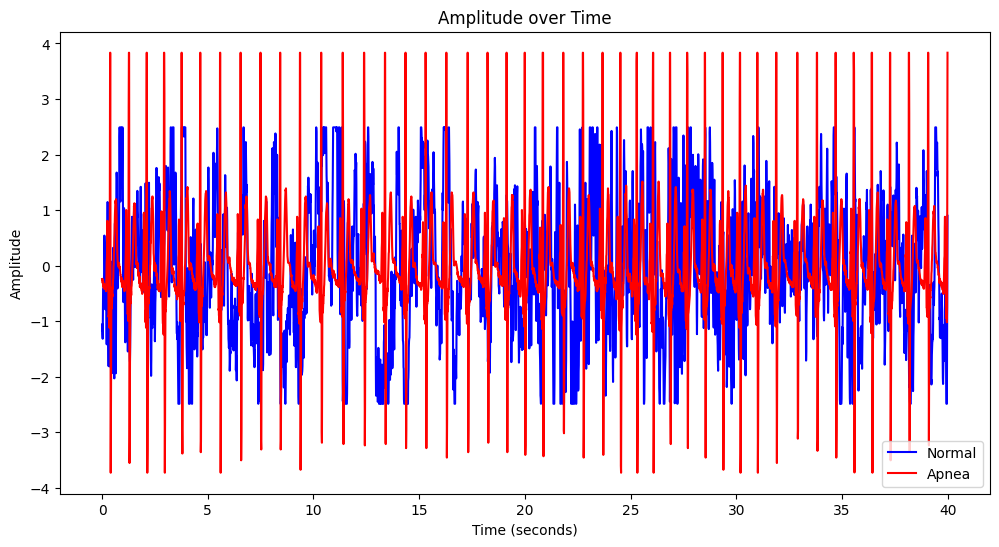

In [ ]:
plt.figure(figsize=(12, 6))
# Plot normal data
normal_data = df_combined[df_combined['label'] == 0]
plt.plot(normal_data['time'][:4000], normal_data['amplitude'][:4000], label='Normal', color='blue')

# Plot apnea data
apnea_data = df_combined[df_combined['label'] == 1]
plt.plot(apnea_data['time'][:4000], apnea_data['amplitude'][:4000], label='Apnea', color='red')

plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Amplitude over Time')
plt.legend()
plt.show()


Convert the dataset into sequences with a fixed window size (e.g., 100 time steps) to feed into the CNN-LSTM.

In [ ]:
# import numpy as np

# def create_sequences(data, time_steps):
#     X, y = [], []
#     for i in range(len(data) - time_steps):
#         X.append(data.iloc[i:i + time_steps][['amplitude']].values)  # Select features
#         y.append(data.iloc[i + time_steps]['label'])  # Select the label for the next time step
#     return np.array(X), np.array(y)

# time_steps = 100  # Define the number of time steps per sequence
# X, y = create_sequences(df_combined, time_steps)

# print("Shape of X:", X.shape)  # Expecting (num_samples, time_steps, num_features)
# print("Shape of y:", y.shape)  # Expecting (num_samples,)


Shape of X: (248340, 100, 1)
Shape of y: (248340,)


Splitting into train and test

In [ ]:
# Split the dataset by label
df_normal = df_combined.iloc[:124220]  # Rows with label 0
df_apnea = df_combined.iloc[124220:]  # Rows with label 1

# Define split ratios
train_ratio = 0.8

# Calculate split indices
normal_split_index = int(len(df_normal) * train_ratio)
apnea_split_index = int(len(df_apnea) * train_ratio)

# Split normal data
train_normal = df_normal.iloc[:normal_split_index]
test_normal = df_normal.iloc[normal_split_index:]

# Split apnea data
train_apnea = df_apnea.iloc[:apnea_split_index]
test_apnea = df_apnea.iloc[apnea_split_index:]

# Combine train and test sets
train_data = pd.concat([train_normal, train_apnea], axis=0)
test_data = pd.concat([test_normal, test_apnea], axis=0)

# Sort the combined sets to preserve temporal order within each label
train_data = train_data.sort_index()
test_data = test_data.sort_index()

# Separate features (X) and labels (y)
X_train = train_data[['amplitude']]
y_train = train_data['label']
X_test = test_data[[ 'amplitude']]
y_test = test_data['label']

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)
print(X_train.head())
print(y_train.head())

Training data shape: (198752, 1) (198752,)
Testing data shape: (49688, 1) (49688,)
   amplitude
0  -1.160233
1  -1.050482
2  -1.233400
3  -1.315713
4  -0.840126
0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64


creating sequences

In [ ]:
import numpy as np

# Function to create sequences
def create_sequences(data, labels, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:i + time_steps].values)  # Create a sequence of features
        y.append(labels.iloc[i + time_steps])  # Corresponding label at the end of the sequence
    return np.array(X), np.array(y)

# Define the number of time steps
time_steps = 100

# Generate sequences for training and testing
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# Print shapes to verify
print("Shape of X_train_seq:", X_train_seq.shape)  # Expecting (num_samples, time_steps, num_features)
print("Shape of y_train_seq:", y_train_seq.shape)  # Expecting (num_samples,)
print("Shape of X_test_seq:", X_test_seq.shape)    # Expecting (num_samples, time_steps, num_features)
print("Shape of y_test_seq:", y_test_seq.shape)    # Expecting (num_samples,)
print(type(X_train_seq))
print(type(y_train_seq))

Shape of X_train_seq: (198652, 100, 1)
Shape of y_train_seq: (198652,)
Shape of X_test_seq: (49588, 100, 1)
Shape of y_test_seq: (49588,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


Defining CNN-LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

# Define the CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 98, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 49, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50)                  │          23,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,307 (91.04 KB)

 Trainable params: 23,307 (91.04 KB)

 Non-trainable params: 0 (0.00 B)

Fiitng model to training data

In [ ]:
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq)
)


Epoch 1/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 199s 32ms/step - accuracy: 0.9807 - loss: 0.0428 - val_accuracy: 0.9976 - val_loss: 0.0096
Epoch 2/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 198s 32ms/step - accuracy: 0.9997 - loss: 0.0014 - val_accuracy: 0.9995 - val_loss: 0.0016
Epoch 3/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 195s 31ms/step - accuracy: 0.9999 - loss: 4.0954e-04 - val_accuracy: 0.9990 - val_loss: 0.0057
Epoch 4/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 201s 31ms/step - accuracy: 0.9998 - loss: 8.5325e-04 - val_accuracy: 0.9985 - val_loss: 0.0074
Epoch 5/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 207s 31ms/step - accuracy: 1.0000 - loss: 2.5865e-04 - val_accuracy: 0.9988 - val_loss: 0.0089
Epoch 6/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 200s 32ms/step - accuracy: 1.0000 - loss: 2.2129e-04 - val_accuracy: 0.9960 - val_loss: 0.0178
Epoch 7/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 189s 30ms/step - accuracy: 0.9999 - loss: 7.6055e-04 - val_accuracy: 0.9999 - val_loss: 4.7107e-04
Epoch 8/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 209

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss} = {test_loss*100}%")
print(f"Test Accuracy: {test_accuracy} = {test_accuracy*100}%")


1550/1550 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9989 - loss: 0.0111
Test Loss: 0.016133425757288933 = 1.6133425757288933%
Test Accuracy: 0.9983665347099304 = 99.83665347099304%


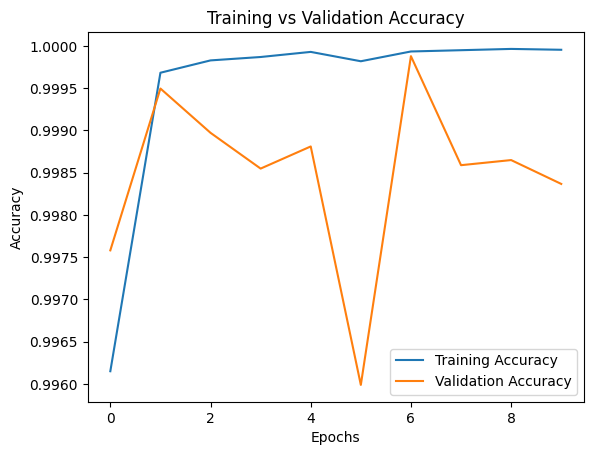

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


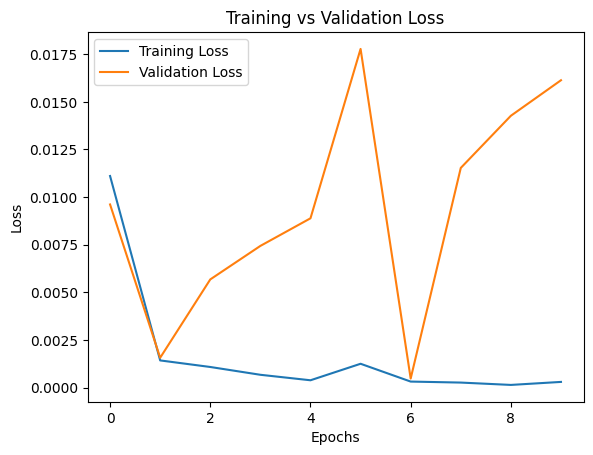

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()



Use the trained model to make predictions on the test set

In [ ]:
# Predict on test data
y_pred = model.predict(X_test_seq)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary classes


1550/1550 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step


In [ ]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test_seq, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24744
           1       1.00      1.00      1.00     24844

    accuracy                           1.00     49588
   macro avg       1.00      1.00      1.00     49588
weighted avg       1.00      1.00      1.00     49588



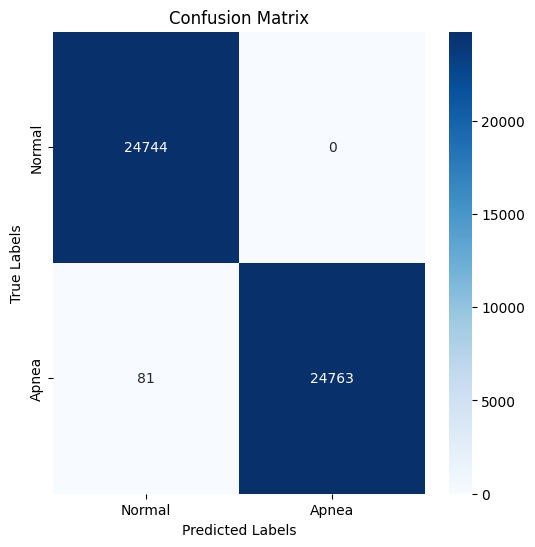

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test_seq, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Apnea'], yticklabels=['Normal', 'Apnea'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


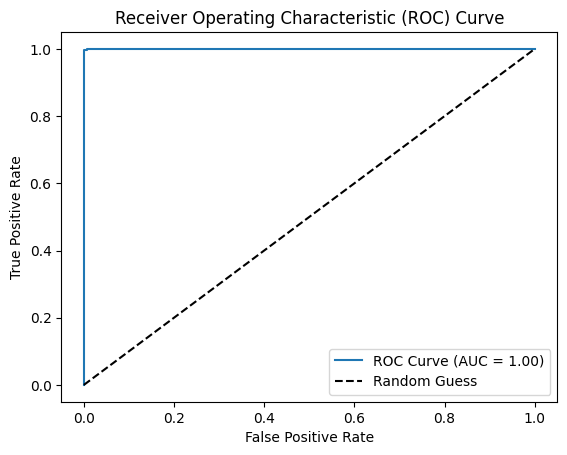

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_seq, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [ ]:
# Save the entire model
model.save('cnn_lstm_model.h5')
from google.colab import files

# Download the model
files.download('cnn_lstm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save the entire model in .keras format
model.save('cnn_lstm_model.keras')
from google.colab import files

# Download the model
files.download('cnn_lstm_model.keras')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

with open('training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)
files.download('training_history.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RNN-LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout

# Define RNN-LSTM model
model_rnn_lstm = Sequential([
    # RNN layer (replace with SimpleRNN if desired)
    LSTM(100, activation='tanh', return_sequences=True, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.2),

    # Optional: Additional LSTM layers
    LSTM(50, activation='tanh', return_sequences=False),
    Dropout(0.2),

    # Dense output layer
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_rnn_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model_rnn_lstm.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 100)            │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_rnn_lstm = model_rnn_lstm.fit(
    X_train_seq, y_train_seq,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_seq, y_test_seq)
)


Epoch 1/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 726s 116ms/step - accuracy: 0.9420 - loss: 0.1371 - val_accuracy: 0.9952 - val_loss: 0.0148
Epoch 2/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 744s 117ms/step - accuracy: 0.9980 - loss: 0.0099 - val_accuracy: 0.9985 - val_loss: 0.0112
Epoch 3/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 729s 117ms/step - accuracy: 0.9983 - loss: 0.0073 - val_accuracy: 0.9983 - val_loss: 0.0106
Epoch 4/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 742s 120ms/step - accuracy: 0.9996 - loss: 0.0027 - val_accuracy: 0.9986 - val_loss: 0.0106
Epoch 5/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 755s 122ms/step - accuracy: 0.9274 - loss: 0.1623 - val_accuracy: 0.9886 - val_loss: 0.0378
Epoch 6/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 756s 122ms/step - accuracy: 0.9895 - loss: 0.0290 - val_accuracy: 0.9970 - val_loss: 0.0155
Epoch 7/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 828s 126ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9983 - val_loss: 0.0131
Epoch 8/10
6208/6208 ━━━━━━━━━━━━━━━━━━━━ 756s 122ms/step - ac

In [ ]:
# Evaluate on test data
test_loss, test_accuracy = model_rnn_lstm.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


1550/1550 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.9990 - loss: 0.0099
Test Loss: 0.014178454875946045, Test Accuracy: 0.9985883831977844


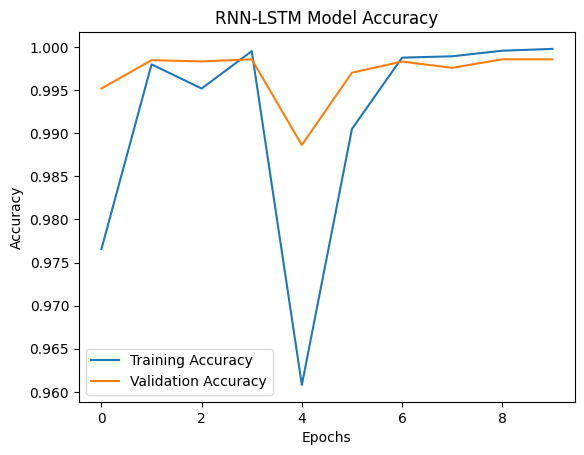

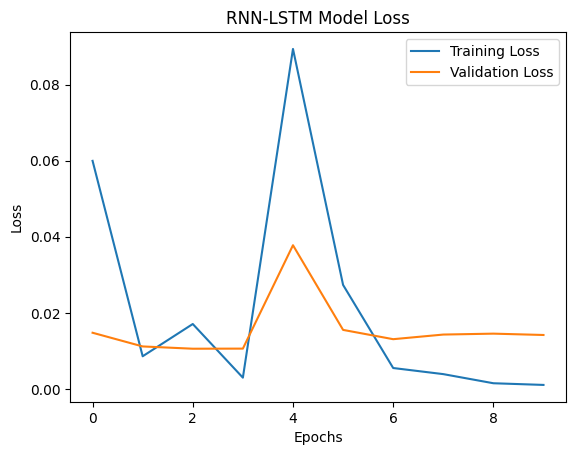

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_rnn_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_rnn_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN-LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_rnn_lstm.history['loss'], label='Training Loss')
plt.plot(history_rnn_lstm.history['val_loss'], label='Validation Loss')
plt.title('RNN-LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model_rnn_lstm.predict(X_test_seq)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class predictions

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test_seq, y_pred_classes))


1550/1550 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24744
           1       1.00      1.00      1.00     24844

    accuracy                           1.00     49588
   macro avg       1.00      1.00      1.00     49588
weighted avg       1.00      1.00      1.00     49588



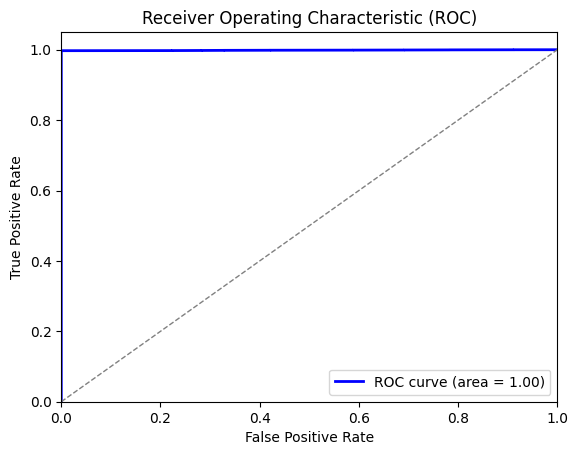

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_seq, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from google.colab import files

# Save the model
model_rnn_lstm.save('rnn_lstm_model.keras')

# Download the model file
files.download('rnn_lstm_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the training history to a pickle file
with open('rnn_lstm_training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

print("Training history saved as 'rnn_lstm_training_history.pkl'.")

# Save the model in H5 format
model.save('rnn_lstm_model.h5')
print("Model saved as 'rnn_lstm_model.h5'.")
from google.colab import files

# Download the training history
files.download('rnn_lstm_training_history.pkl')

# Download the model
files.download('rnn_lstm_model.h5')


Training history saved as 'rnn_lstm_training_history.pkl'.
Model saved as 'rnn_lstm_model.h5'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json

# Save the training history to a JSON file
with open('cnn_lstm_training_history.json', 'w') as f:
    json.dump(history.history, f)

print("Training history saved as 'cnn_lstm_training_history.json'.")
from google.colab import files

# Download the training history
files.download('cnn_lstm_training_history.json')


Training history saved as 'cnn_lstm_training_history.json'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json

# Save the training history to a JSON file
with open('rnn_lstm_training_history.json', 'w') as f:
    json.dump(history.history, f)

print("Training history saved as 'rnn_lstm_training_history.json'.")

from google.colab import files

# Download the JSON file
files.download('rnn_lstm_training_history.json')


Training history saved as 'rnn_lstm_training_history.json'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>